## Applications of Machine Learning in Human Resources Management
## Data Cleaning & Exploratory Data Analysis (EDA)

Inspired by the capstone for my data analytics course with BCG-RISE, this project attempts to showcase how Machine Learning can be implemented in the field of Human Resources Management. A dummy HR dataset was created and the project background and objectives are laid out below.

### Background:
The HR team at Company XYZ are facing issues with the workforce annual performance appraisal exercise - there is a high dependency on managers and lack of visibility/understanding on appraisal ranks assigned.

### Business Objectives:
- Re-empower the HR team to have effective talent conversations with the workforce
- Retain top-talent employees within the firm
- Segment workforce into "buckets" with similar employee characteristics for broad talent-development strategies

### Analytical Objectives:
- Identify key drivers of an employee's performance
- Build a predictive model for an employee's risk of attrition
- Identify important employee characteristics

### Machine Learning Applications:
- Leverage a multi-classification model with employee performance as a target variable
- Build a multi-classification model to predict employees' risk of attrition
- Build a Clustering model to group employees with similar characteristics

In the first of three notebooks, we will clean the data and explore the dataset. In the second notebook, we will proceed to build the multi-classification models. In the last notebook, we will build the clustering model.

In [1]:
#basic libraries
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint #pretty printing

#define graph settings
sns.set(style = "whitegrid")

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

## <mark> Initialize the dataset

In [2]:
df = pd.read_excel("dummy_HR_data.xlsx")
pd.set_option('display.max_columns', None)
df.head()

,emp_id,BusinessUnit_Primary,BusinessUnit_Secondary,BusinessUnit_Tertiary,Entity,Function,JobTitle,Country,City,Job_Grade,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Citizenship,Race,Graduate,AppraisalRank_Current,AppraisalRank_LastYear,AttritionRisk,ExpectedNextMove,TargetedRole
0,1,BU_P1,BU_S1,?,?,Business Services,Admin Assistant,?,?,1,1,>15,10-15,Female,5,NaN,Hispano,No,Rank 8,Rank 8,Low,> 12 months,NaN
1,2,BU_P1,BU_S1,?,?,Business Services,Admin Assistant,?,?,1,1,>15,10-15,Female,4,NaN,British,No,Rank 5,Rank 5,Low,> 12 months,NaN
2,3,BU_P1,BU_S1,?,?,Sales & Marketing,Manager 1,?,?,5,5,10-15,10-15,Male,6,AU,British,No,Rank 8,Rank 8,Low,> 12 months,NaN
3,4,BU_P1,BU_S1,?,?,Sales & Marketing,Adviser 1,?,?,3,3,1-3,1-3,Female,4,FR,Chinese,No,Rank 3,Rank 3,Low,> 12 months,NaN
4,5,BU_P1,BU_S1,BU_T103,"Entity 14, CAN",Sales & Marketing,Analyst 2,CAN,"Montreal, QC",2,2,>15,1-3,Female,5,CA,Scottish,No,Rank 3,Rank 3,Low,> 12 months,NaN


From the above preview of the dataframe, we observe: (i) problematic data "?" in certain columns, and (ii) NaN values. These will have to be cleaned and treated before we proceed with our analysis. We can also see that 'emp_id' is the unique identifier for the dataframe.

## <mark> Understanding the data and initial preparation

In [3]:
df.shape

(943, 23)

In [4]:
#check data type of each column using "dtypes" function
print("Data types for the dataframe:")
df.dtypes

Data types for the dataframe:


emp_id                     int64
BusinessUnit_Primary      object
BusinessUnit_Secondary    object
BusinessUnit_Tertiary     object
Entity                    object
Function                  object
JobTitle                  object
Country                   object
City                      object
Job_Grade                  int64
Pay_Grade                  int64
EmpDuration_Company       object
EmpDuration_Position      object
Gender                    object
Age_Decade                 int64
Citizenship               object
Race                      object
Graduate                  object
AppraisalRank_Current     object
AppraisalRank_LastYear    object
AttritionRisk             object
ExpectedNextMove          object
TargetedRole              object
dtype: object

The data types are inline with our expectation and understanding of the dataset from the data dictionary. There are some issues we might need to address later in Feature Engineering: (i) 'EmpDuration_Company' and 'EmpDuration_Position' are "object" as opposed to "int" as they represent time intervals (e.g. >1, 1-3,...), (ii) 'PerformanceRank_Current' and 'PerformanceRank_LastYear' are also "object" and should be casted to "int" so that we can perform calculations. Lastly, we also cast 'emp_id' to str as it is an identifier and calculations will be meaningless.

In [5]:
#cast 'emp_id' to str
df['emp_id'] = df['emp_id'].astype(str)

In [6]:
#get the number of unique values in each column
df.nunique()

emp_id                    943
BusinessUnit_Primary        8
BusinessUnit_Secondary     39
BusinessUnit_Tertiary     307
Entity                     29
Function                   12
JobTitle                   18
Country                     7
City                       10
Job_Grade                   6
Pay_Grade                   7
EmpDuration_Company         6
EmpDuration_Position        6
Gender                      2
Age_Decade                  6
Citizenship                51
Race                       13
Graduate                    2
AppraisalRank_Current       9
AppraisalRank_LastYear      9
AttritionRisk               3
ExpectedNextMove            2
TargetedRole               16
dtype: int64

In [7]:
#print the distribution of each column
for i in df.columns.tolist():
    print(i)
    print(df[i].value_counts())
    print('')

emp_id
321    1
302    1
63     1
491    1
672    1
      ..
676    1
608    1
606    1
122    1
35     1
Name: emp_id, Length: 943, dtype: int64

BusinessUnit_Primary
BU_P6    340
BU_P5    236
BU_P4    130
BU_P1    101
BU_P8     74
BU_P2     40
BU_P3     12
BU_P7     10
Name: BusinessUnit_Primary, dtype: int64

BusinessUnit_Secondary
BU_S32    100
BU_S30     88
BU_S20     75
BU_S1      62
BU_S17     49
BU_S28     46
BU_S27     41
BU_S25     41
BU_S23     38
BU_S36     30
BU_S33     29
BU_S15     27
BU_S22     26
BU_S26     25
BU_S39     24
BU_S21     22
BU_S29     22
BU_S7      21
BU_S31     14
BU_S18     14
BU_S38     14
BU_S2      13
BU_S3      13
BU_S4      13
BU_S19     13
BU_S8      10
BU_S24      9
BU_S13      9
BU_S16      9
BU_S14      8
BU_S34      7
BU_S35      5
BU_S6       5
BU_S10      4
BU_S5       4
BU_S12      4
BU_S11      2
BU_S9       2
BU_S37      1
Name: BusinessUnit_Secondary, dtype: int64

BusinessUnit_Tertiary
?          169
BU_T55      11
BU_T298      9
BU_T24

From the above, we identified:
- problematic data "?" in 'BusinessUnit_Tertiary', 'Entity', 'Country', 'City', and 
- other problematic data "0" and "Unknown" in 'Citizenship'

## <mark> Data cleaning

Given the issues we identified in the initial preparation, we proceed with data cleaning.

#### Check for duplicates in employee id

In [8]:
for i in df['emp_id'].duplicated(keep = False): #keep = False marks all duplicates as True
    if i == True:
        print(i)
    else:
        pass

There are no duplicate entries in the dataset

#### Check for problematic and missing data

In [9]:
#check for NaN
def check_nan(df):
    count = 0
    for i in df.columns.tolist():
        if df[i].isna().sum() > 0:
            count = count + 1
            print(i, ':', df[i].isna().sum(), '', str(round(df[i].isna().sum() / len(df) * 100, 2)) + '%')
        else:
            pass
    print('\nNo. of columns with NaN: ', count)

check_nan(df)

BusinessUnit_Secondary : 4  0.42%
EmpDuration_Company : 1  0.11%
Citizenship : 77  8.17%
AttritionRisk : 33  3.5%
ExpectedNextMove : 32  3.39%
TargetedRole : 714  75.72%

No. of columns with NaN:  6


In [10]:
#recode "0" and "Unknown" in 'Citizenship' to "?" for further cleaning
df.loc[(df['Citizenship'] == 0) | (df['Citizenship'] == "Unknown"), 'Citizenship'] = "?"

In [11]:
#check for "?"
def check_problematic(df):
    count = 0
    for i in df.columns.tolist():
        if df[i].loc[df[i] == "?"].count() > 0:
            print(i, ':', str(df[i].loc[df[i] == "?"].count()), #print the column name and count
                  str(round(df[i].loc[df[i] == "?"].count() / len(df[i]) * 100, 2)) + '%') #print the % of problematic
            count = count + 1
        else:
            pass
    print('\nNo. of columns with "?": ', count)
    
check_problematic(df)

BusinessUnit_Tertiary : 169 17.92%
Entity : 169 17.92%
Country : 169 17.92%
City : 169 17.92%
Citizenship : 36 3.82%

No. of columns with "?":  5


From the above, there are:
- 6 columns with NaN values: 'BusinessUnit_Secondary', 'EmpDuration_Company', 'Citizenship', 'AttritionRisk', 'ExpectedNextMove', and 'TargetedRole'
- 5 columns with problematic data: 'BusinessUnit_Tertiary', 'Entity', 'Country', 'City' and 'Citizenship'

We will proceed with solving for the problematic data first.

#### Cleaning problematic data

We will tackle the big chunk of problematic data in 'BusinessUnit_Tertiary', 'Entity', 'Country' and 'City' first. 

Exploring further, we observe that when 'BusinessUnit_Tertiary' = "?", 'Entity', 'Country' and 'City' also = "?", and there are 169 instances. This can be seen below:

In [12]:
#establishing the above
#adding Primary and Secondary units to observe relationships later
target_col = ['BusinessUnit_Primary', 'BusinessUnit_Secondary',
              'BusinessUnit_Tertiary', 'Entity', 'Country', 'City']
df_temp = df[target_col]
df_temp[(df['BusinessUnit_Tertiary'] == "?") & (df['Entity'] == "?") & 
        (df['Country'] == "?") & (df['City'] == "?")]

,BusinessUnit_Primary,BusinessUnit_Secondary,BusinessUnit_Tertiary,Entity,Country,City
0,BU_P1,BU_S1,?,?,?,?
1,BU_P1,BU_S1,?,?,?,?
2,BU_P1,BU_S1,?,?,?,?
3,BU_P1,BU_S1,?,?,?,?
11,BU_P1,BU_S1,?,?,?,?
...,...,...,...,...,...,...
871,BU_P8,BU_S35,?,?,?,?
872,BU_P8,BU_S35,?,?,?,?
873,BU_P8,BU_S35,?,?,?,?
929,BU_P8,BU_S39,?,?,?,?


We explore this relationship further by looking for information in other columns: 'BusinessUnit_Primary' and 'BusinessUnit_Secondary'
***
**Note:** Given that the dataset only contains 943 values, this exploration is easier to conduct in Microsoft Excel using a PivotTable. The code below serves to showcase the logical process of how we might fill-in these problematic data.
***
**Note:** Upon further EDA, we eventually concluded that 'BusinessUnit_Tertiary' is unlikely to be informative with 307 unique values, and will drop the column later. Therfore, in the following data cleaning, we will ignore treating 'BusinessUnit_Tertiary'.

In [13]:
pd.crosstab(index = df_temp['BusinessUnit_Primary'],
                     columns = df_temp['Entity'])

Entity,?,"Entity 1, CAN","Entity 10, SGP","Entity 11, SGP","Entity 12, CHN","Entity 13, AUS","Entity 14, CAN","Entity 15, SGP","Entity 16, SGP","Entity 17, DEU","Entity 18, SGP","Entity 19, SGP","Entity 2, SGP","Entity 20, CHN","Entity 21, USA","Entity 22, SGP","Entity 23, SGP","Entity 24, AUS","Entity 25, SGP","Entity 26, AUS","Entity 27, USA","Entity 28, USA","Entity 3, AUS","Entity 4, CAN","Entity 5, AUS","Entity 6, USA","Entity 7, AUS","Entity 8, CAN","Entity 9, SGP"
BusinessUnit_Primary,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU_P1,14,1,0,0,2,0,32,0,0,1,0,0,0,0,10,9,18,11,0,0,0,3,0,0,0,0,0,0,0
BU_P2,13,0,0,9,5,0,0,0,0,0,0,0,0,0,8,0,0,4,0,0,0,1,0,0,0,0,0,0,0
BU_P3,8,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BU_P4,27,0,0,8,11,0,3,0,0,14,0,2,5,0,26,0,0,0,15,0,0,3,0,1,0,0,0,15,0
BU_P5,5,0,41,0,4,0,47,100,9,2,6,0,1,0,8,0,1,7,0,1,0,3,0,0,0,1,0,0,0
BU_P6,85,0,0,0,5,0,60,0,0,0,0,0,0,0,0,0,0,3,0,161,14,1,0,1,1,0,2,0,7
BU_P7,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
BU_P8,7,0,1,0,24,1,0,0,22,0,0,0,0,11,0,0,0,1,0,0,0,0,5,0,0,0,2,0,0


In [14]:
pd.crosstab(index = [df_temp['BusinessUnit_Primary'], df_temp['BusinessUnit_Secondary']],
                     columns = [df_temp['Country'], df_temp['City']])

Country                                       ?           AUS            \
City                                          ? Brisbane, QLD Perth, WA   
BusinessUnit_Primary BusinessUnit_Secondary                               
BU_P1                BU_S1                    8             4         0   
                     BU_S2                    0             0         0   
                     BU_S3                    6             5         0   
                     BU_S4                    0             2         0   
BU_P2                BU_S5                    0             0         0   
                     BU_S6                    0             0         0   
                     BU_S7                   13             0         4   
                     BU_S8                    0             0         0   
BU_P3                BU_S10                   3             0         0   
                     BU_S11                   0             0         0   
                     BU_S12                   4             0         0   
                     BU_S9                    1             0         0   
BU_P4                BU_S13                   0             0         0   
                     BU_S14                   3             0         0   
                     BU_S15                   4             0         0   
                     BU_S16                   5             0         0   
                     BU_S17                  12             0         0   
                     BU_S18                   3             0         0   
                     BU_S19                   0             0         0   
BU_P5                BU_S20                   1             1         0   
                     BU_S21                   0             0         1   
                     BU_S22                   1             0         0   
                     BU_S23                   0             0         0   
                     BU_S24                   0             0         0   
                     BU_S25                   1             2         1   
                     BU_S26                   2             0         3   
BU_P6                BU_S27                   0            11        17   
                     BU_S28                   2             1        29   
                     BU_S29                   0             0        21   
                     BU_S30                  16            14        58   
                     BU_S31                   0             5         5   
                     BU_S32                  38             6         0   
                     BU_S33                  29             0         0   
BU_P7                BU_S34                   7             0         0   
BU_P8                BU_S35                   5             0         0   
                     BU_S36                   0             0         0   
                     BU_S37                   0             0         0   
                     BU_S38                   0             0         0   
                     BU_S39                   2             0         9   

Country                                              CAN                  \
City                                        Montreal, QC Sorel-Tracy, QC   
BusinessUnit_Primary BusinessUnit_Secondary                                
BU_P1                BU_S1                            27               0   
                     BU_S2                             4               0   
                     BU_S3                             0               0   
                     BU_S4                             2               0   
BU_P2                BU_S5                             0               0   
                     BU_S6                             0               0   
                     BU_S7                             0               0   
                     BU_S8                             0               0   
BU_P3        

From the above crosstab, we note that: when 'BusinessUnit_Primary' = "BU_P3", there is only one 'Entity' = "Entity 12, CHN", where 'Country' = "CHN" and 'City' = "Shanghai, 31". Therefore, we will custom-treat the problematic data "?" for rows (8 rows) with 'BusinessUnit_Primary' = "BU_P3" as such.

As the data is redacted, we also note that 'BusinessUnit_Primary' = "BU_P7" is a Japan unit. Therefore, we will custom-treat the problematic data "?" for rows (10 rows) with 'BusinessUnit_Primary' = "BU_P7" with:
- 'Entity' = "Entity 29, JPN",
- 'Country' = "JPN", and
- 'City' = "Tokyo, JP"

No other discernable relationships can be established for the remaining 151 rows of problematic data "?", therefore we will general-treat these with:
- 'Entity' = "Entity 30, GLB", #which makes logical sense to lump into a global entity
- 'Country' = "GLB", and
- 'City' = "Global"

As discussed above, with 307 unique values, 'BusinessUnit_Tertiary' is unlikely to be an informative column. Therefore, we will drop the column for the analysis

In [15]:
#custom treatment for 'BusinessUnit_Primary' = "BU_P3"
for i in range (0, len(df)):
    if ((df['BusinessUnit_Primary'][i] == "BU_P3") and (df['Entity'][i] == "?")):
        df['Entity'][i] = df['Entity'][i].replace("?", "Entity 12, CHN")
        df['Country'][i] = df['Country'][i].replace("?", "CHN")
        df['City'][i] = df['City'][i].replace("?", "Shanghai, 31")
    else:
        pass

In [16]:
#custom treatment for 'BusinessUnit_Primary' = "BU_7"
for i in range (0, len(df)):
    if ((df['BusinessUnit_Primary'][i] == "BU_P7") and (df['Entity'][i] == "?")):
        df['Entity'][i] = df['Entity'][i].replace("?", "Entity 29, JPN")
        df['Country'][i] = df['Country'][i].replace("?", "JPN")
        df['City'][i] = df['City'][i].replace("?", "Tokyo, JP")
    else:
        pass

In [17]:
#general treatment for "?" values in 'Entity', 'Country', and 'City'
for i in range (0, len(df)):
    if df['Entity'][i] == "?":
        df['Entity'][i] = df['Entity'][i].replace("?", "Entity 30, GLB")
        df['Country'][i] = df['Country'][i].replace("?", "GLB")
        df['City'][i] = df['City'][i].replace("?", "Global")
    else:
        pass

In [18]:
#dropping 'BusinessUnit_Tertiary'
df.drop(['BusinessUnit_Tertiary'], axis = 1, inplace = True)

In [19]:
#check for problematic data
check_problematic(df)

Citizenship : 36 3.82%

No. of columns with "?":  1


As there are also missing values in Citizenship, we will recode problematic data "?" to NaN and investigate further.

In [20]:
#recode "?" in 'Citizenship' to NaN
df.loc[df['Citizenship'] == "?", 'Citizenship'] = np.nan

#### Cleaning NaN values

In [21]:
#as a refresher, we re-run the NaN check to see what we have to clean
check_nan(df)

BusinessUnit_Secondary : 4  0.42%
EmpDuration_Company : 1  0.11%
Citizenship : 113  11.98%
AttritionRisk : 33  3.5%
ExpectedNextMove : 32  3.39%
TargetedRole : 714  75.72%

No. of columns with NaN:  6


#### Cleaning NaN values - 'BusinessUnit_Secondary'

In [22]:
#viewing the 4 rows where 'BusinessUnit_Secondary' is NaN
df[df['BusinessUnit_Secondary'].isna()]

,emp_id,BusinessUnit_Primary,BusinessUnit_Secondary,Entity,Function,JobTitle,Country,City,Job_Grade,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Citizenship,Race,Graduate,AppraisalRank_Current,AppraisalRank_LastYear,AttritionRisk,ExpectedNextMove,TargetedRole
170,171,BU_P4,NaN,"Entity 11, SGP",Business Services,Admin Assistant,SGP,"SingaporeCty,SG",1,1,10-15,3-5,Female,5,SG,Chinese,No,Rank 8,Rank 8,Low,> 12 months,NaN
866,867,BU_P7,NaN,"Entity 29, JPN",Investor Relations,Senior Adviser 2,JPN,"Tokyo, JP",6,6,10-15,<1,Male,4,NaN,British,No,Rank 5,Rank 5,Medium,> 12 months,NaN
867,868,BU_P7,NaN,"Entity 29, JPN",Business Services,Admin Assistant,JPN,"Tokyo, JP",1,1,>15,10-15,Female,4,NaN,British,No,Rank 8,Rank 8,Low,> 12 months,NaN
868,869,BU_P7,NaN,"Entity 29, JPN",Technology,Senior Adviser 1,JPN,"Tokyo, JP",5,5,5-10,5-10,Male,4,NaN,Canadian,No,Rank 5,Rank 5,Medium,< 12 months,NaN


In [23]:
#viewing the rows when 'BusinessUnit_Primary' = "BU_P4" and 'Country' = "SGP"
temp = df[(df['BusinessUnit_Primary'] == "BU_P4") & (df['Country'] == "SGP")]
temp

,emp_id,BusinessUnit_Primary,BusinessUnit_Secondary,Entity,Function,JobTitle,Country,City,Job_Grade,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Citizenship,Race,Graduate,AppraisalRank_Current,AppraisalRank_LastYear,AttritionRisk,ExpectedNextMove,TargetedRole
153,154,BU_P4,BU_S13,"Entity 2, SGP",Sales & Marketing,Manager 2,SGP,"SingaporeCty,SG",5,6,1-3,1-3,Female,4,SG,Chinese,No,Rank 5,Rank 5,Low,< 12 months,NaN
154,155,BU_P4,BU_S13,"Entity 2, SGP",Sales & Marketing,Analyst 1,SGP,"SingaporeCty,SG",1,1,1-3,<1,Male,4,SG,Chinese,No,Rank 8,Rank 8,Medium,> 12 months,NaN
155,156,BU_P4,BU_S13,"Entity 2, SGP",Sales & Marketing,Analyst 2,SGP,"SingaporeCty,SG",1,2,1-3,<1,Female,3,SG,Chinese,No,Rank 8,Rank 8,Low,> 12 months,NaN
157,158,BU_P4,BU_S13,"Entity 2, SGP",Sales & Marketing,Manager 1,SGP,"SingaporeCty,SG",5,5,1-3,1-3,Male,3,BE,Malays,No,Rank 7,Rank 7,Medium,> 12 months,NaN
158,159,BU_P4,BU_S13,"Entity 2, SGP",Sales & Marketing,Analyst 1,SGP,"SingaporeCty,SG",1,1,<1,<1,Female,2,SG,Malays,Yes,Rank 8,Rank 8,Low,> 12 months,NaN
159,160,BU_P4,BU_S13,"Entity 11, SGP",Sales & Marketing,Manager 2,SGP,"SingaporeCty,SG",6,6,5-10,1-3,Female,4,GB,Chinese,No,Rank 5,Rank 5,Low,> 12 months,NaN
160,161,BU_P4,BU_S13,"Entity 19, SGP",Supply Chain,Adviser 2,SGP,"SingaporeCty,SG",4,4,10-15,5-10,Female,4,SG,Chinese,No,Rank 8,Rank 8,Low,< 12 months,Floor Manager
161,162,BU_P4,BU_S13,"Entity 19, SGP",Supply Chain,Analyst 2,SGP,"SingaporeCty,SG",2,2,5-10,3-5,Female,4,SG,Indian,No,Rank 5,Rank 5,Medium,< 12 months,Analyst 1
164,165,BU_P4,BU_S14,"Entity 11, SGP",Sales & Marketing,Adviser 2,SGP,"SingaporeCty,SG",4,4,1-3,<1,Male,3,SG,Chinese,No,Rank 1,Rank 1,Medium,< 12 months,Senior Adviser 1
170,171,BU_P4,NaN,"Entity 11, SGP",Business Services,Admin Assistant,SGP,"SingaporeCty,SG",1,1,10-15,3-5,Female,5,SG,Chinese,No,Rank 8,Rank 8,Low,> 12 months,NaN


In [24]:
#viewing the distribution of 'BusinessUnit_Secondary' of above
temp['BusinessUnit_Secondary'].value_counts()

BU_S17    12
BU_S13     8
BU_S19     3
BU_S16     3
BU_S15     2
BU_S14     1
Name: BusinessUnit_Secondary, dtype: int64

In [25]:
#viewing the rows when 'BusinessUnit_Primary' = "BU_P7"
df[df['BusinessUnit_Primary'] == "BU_P7"]

,emp_id,BusinessUnit_Primary,BusinessUnit_Secondary,Entity,Function,JobTitle,Country,City,Job_Grade,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Citizenship,Race,Graduate,AppraisalRank_Current,AppraisalRank_LastYear,AttritionRisk,ExpectedNextMove,TargetedRole
859,860,BU_P7,BU_S34,"Entity 29, JPN",Sales & Marketing,Adviser 2,JPN,"Tokyo, JP",4,4,>15,10-15,Male,4,NaN,White,No,Rank 5,Rank 3,Low,< 12 months,Manager 1
860,861,BU_P7,BU_S34,"Entity 29, JPN",Investor Relations,Analyst 1,JPN,"Tokyo, JP",1,1,>15,10-15,Female,5,NaN,Canadian,No,Rank 8,Rank 6,Low,> 12 months,Analyst 2
861,862,BU_P7,BU_S34,"Entity 29, JPN",Investor Relations,Senior Adviser 1,JPN,"Tokyo, JP",5,5,10-15,3-5,Female,4,NaN,British,No,Rank 2,Rank 2,Low,> 12 months,Senior Adviser 2
862,863,BU_P7,BU_S34,"Entity 29, JPN",Finance,Analyst 2,JPN,"Tokyo, JP",2,2,5-10,1-3,Female,3,KR,Chinese,No,Rank 6,Rank 6,High,> 12 months,Adviser 1
863,864,BU_P7,BU_S34,"Entity 29, JPN",Finance,Analyst 1,JPN,"Tokyo, JP",1,1,<1,<1,Female,3,JP,Hispano,No,Rank 4,Rank 4,Low,> 12 months,Analyst 2
864,865,BU_P7,BU_S34,"Entity 29, JPN",Investor Relations,Senior Adviser 2,JPN,"Tokyo, JP",6,6,1-3,1-3,Female,5,JP,Chinese,No,Rank 7,Rank 7,Medium,> 12 months,Senior Adviser 3
865,866,BU_P7,BU_S34,"Entity 29, JPN",Finance,Analyst 2,JPN,"Tokyo, JP",2,2,1-3,1-3,Female,4,KR,English,No,Rank 6,Rank 6,Low,< 12 months,Adviser 1
866,867,BU_P7,NaN,"Entity 29, JPN",Investor Relations,Senior Adviser 2,JPN,"Tokyo, JP",6,6,10-15,<1,Male,4,NaN,British,No,Rank 5,Rank 5,Medium,> 12 months,NaN
867,868,BU_P7,NaN,"Entity 29, JPN",Business Services,Admin Assistant,JPN,"Tokyo, JP",1,1,>15,10-15,Female,4,NaN,British,No,Rank 8,Rank 8,Low,> 12 months,NaN
868,869,BU_P7,NaN,"Entity 29, JPN",Technology,Senior Adviser 1,JPN,"Tokyo, JP",5,5,5-10,5-10,Male,4,NaN,Canadian,No,Rank 5,Rank 5,Medium,< 12 months,NaN


From above, we will fill-in the missing values for 'BusinessUnit_Secondary' as follows:
- we fill the first instance with the mode ("BU_S17") of 'BusinessUnit_Primary' = "BU_P4" and 'Country' = "SGP"
- we fill the remaining three instances with "BU_S34"

In [26]:
#filling-in NaN values for 'BusinessUnit_Secondary'
for i in range(0, len(df)):
    if pd.isna(df['BusinessUnit_Secondary'][i]):
        if df['BusinessUnit_Primary'][i] == "BU_P4" and df['Country'][i] == "SGP":
            df['BusinessUnit_Secondary'][i] = "BU_S17"
        elif df['BusinessUnit_Primary'][i] == "BU_P7":
             df['BusinessUnit_Secondary'][i] = "BU_S34"
        else:
            pass

#### Cleaning NaN values - 'EmpDuration_Company'

In [27]:
#viewing the row where 'EmpDuration_Company' is NaN
df[df['EmpDuration_Company'].isna()]

,emp_id,BusinessUnit_Primary,BusinessUnit_Secondary,Entity,Function,JobTitle,Country,City,Job_Grade,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Citizenship,Race,Graduate,AppraisalRank_Current,AppraisalRank_LastYear,AttritionRisk,ExpectedNextMove,TargetedRole
75,76,BU_P1,BU_S3,"Entity 12, CHN",Sales & Marketing,Senior Adviser 1,CHN,"Shanghai, 31",5,5,NaN,1-3,Female,3,CN,Chinese,No,Rank 1,Rank 1,Low,> 12 months,NaN


In [28]:
#viewing the relationship of 'EmpDuration_Company' vs. 'EmpDuration_Position'
pd.crosstab(index = df['EmpDuration_Company'], columns = df['EmpDuration_Position'])

EmpDuration_Position,1-3,10-15,3-5,5-10,<1,>15
EmpDuration_Company,,,,,,
1-3,190,0,0,0,77,0
10-15,63,24,19,15,47,0
3-5,52,0,20,0,46,0
5-10,84,0,13,30,54,0
<1,0,0,0,0,104,0
>15,43,17,8,17,9,10


As 'EmpDuration_Position' = "1-3" tends to have 'EmpDuration_Company' = "1-3", we will fill the missing value as such.

In [29]:
for i in range(0, len(df)):
    if pd.isna(df['EmpDuration_Company'][i]):
        df['EmpDuration_Company'][i] = "1-3"
    else:
        pass

#### Cleaning NaN values - 'Citizenship'

In [30]:
#viewing the rows where 'Citizenship' is NaN
df[df['Citizenship'].isna()]

,emp_id,BusinessUnit_Primary,BusinessUnit_Secondary,Entity,Function,JobTitle,Country,City,Job_Grade,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Citizenship,Race,Graduate,AppraisalRank_Current,AppraisalRank_LastYear,AttritionRisk,ExpectedNextMove,TargetedRole
0,1,BU_P1,BU_S1,"Entity 30, GLB",Business Services,Admin Assistant,GLB,Global,1,1,>15,10-15,Female,5,NaN,Hispano,No,Rank 8,Rank 8,Low,> 12 months,NaN
1,2,BU_P1,BU_S1,"Entity 30, GLB",Business Services,Admin Assistant,GLB,Global,1,1,>15,10-15,Female,4,NaN,British,No,Rank 5,Rank 5,Low,> 12 months,NaN
6,7,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 1,CAN,"Montreal, QC",1,1,3-5,<1,Female,2,NaN,Canadian,No,Rank 3,Rank 3,Medium,< 12 months,NaN
26,27,BU_P1,BU_S1,"Entity 30, GLB",Sales & Marketing,Senior Adviser 1,GLB,Global,5,5,5-10,5-10,Male,4,NaN,Scottish,No,Rank 5,Rank 5,Low,> 12 months,NaN
48,49,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Adviser 1,CAN,"Montreal, QC",3,3,3-5,1-3,Male,3,NaN,Scottish,No,Rank 3,Rank 3,Medium,< 12 months,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,913,BU_P8,BU_S38,"Entity 12, CHN",Sales & Marketing,Adviser 1,CHN,"Shanghai, 31",2,3,1-3,1-3,Female,2,NaN,Chinese,No,Rank 1,Rank 1,Low,< 12 months,NaN
926,927,BU_P8,BU_S39,"Entity 3, AUS",Sales & Marketing,Adviser 1,AUS,"Perth, WA",4,3,1-3,<1,Female,4,NaN,British,No,Rank 8,Rank 8,Low,> 12 months,NaN
933,934,BU_P8,BU_S39,"Entity 12, CHN",Sales & Marketing,Manager 1,CHN,"Shanghai, 31",5,5,1-3,<1,Male,4,NaN,Chinese,No,Rank 1,Rank 1,Low,< 12 months,Others
934,935,BU_P8,BU_S39,"Entity 12, CHN",Sales & Marketing,Adviser 2,CHN,"Shanghai, 31",4,4,1-3,1-3,Female,4,NaN,Chinese,No,Rank 3,Rank 3,Low,> 12 months,NaN


In [31]:
#we have to recode the NaN values back to "?" to view the results in crosstab with 'Country'
for i in range(0, len(df)):
    if pd.isna(df['Citizenship'][i]):
        df['Citizenship'][i] = "?"
    else:
        pass

#viewing the relationship of 'Citizenship' vs. 'Country'
pd.crosstab(index = df['Citizenship'], columns = df['Country'])

Country,AUS,CAN,CHN,DEU,GLB,JPN,SGP,USA
Citizenship,,,,,,,,
?,42,7,19,5,23,6,3,8
AR,1,0,0,0,0,0,0,0
AU,129,0,2,0,13,0,25,1
BE,0,0,0,0,9,0,1,0
BR,0,2,0,0,1,0,2,2
BY,0,0,0,0,1,0,0,0
CA,0,120,0,0,28,0,2,10
CN,2,4,51,0,5,0,15,3
CO,2,5,0,0,0,0,1,1


We explored 'Citizenship' with 'Race' and 'Country' and decided that 'Country' had a cleaner relationship. Therefore, we will use information from 'Country' to fill the NaN values (which been recoded to "?") for 'Citizenship'. This is predicated on the assumption that native citizens tend to work in their home country, which can be observed from the crosstab above.

In [32]:
for i in range(0, len(df)):
    if df['Citizenship'][i] == "?":
        if df['Country'][i] == "AUS":
            df['Citizenship'][i] = "AU"
        elif df['Country'][i] == "CAN":
            df['Citizenship'][i] = "CA"
        elif df['Country'][i] == "CHN":
            df['Citizenship'][i] = "CN"
        elif df['Country'][i] == "DEU":
            df['Citizenship'][i] = "DE"
        elif df['Country'][i] == "GLB":
            df['Citizenship'][i] = "GL" #creating a new Citizenship "GL" for Global
        elif df['Country'][i] == "JPN":
            df['Citizenship'][i] = "JP"
        elif df['Country'][i] == "SGP":
            df['Citizenship'][i] = "SG"
        else:
            df['Citizenship'][i] = "USA"

#### Cleaning NaN values - 'AttritionRisk'

In [33]:
#viewing the rows where 'AttritionRisk' is NaN
df[df['AttritionRisk'].isna()]

,emp_id,BusinessUnit_Primary,BusinessUnit_Secondary,Entity,Function,JobTitle,Country,City,Job_Grade,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Citizenship,Race,Graduate,AppraisalRank_Current,AppraisalRank_LastYear,AttritionRisk,ExpectedNextMove,TargetedRole
10,11,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 2,CAN,"Montreal, QC",3,2,>15,<1,Female,4,CA,Canadian,No,Rank 8,Rank 8,NaN,NaN,NaN
13,14,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 1,CAN,"Montreal, QC",1,1,1-3,1-3,Male,2,CA,Scottish,No,Rank 8,Rank 8,NaN,NaN,NaN
14,15,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 1,CAN,"Montreal, QC",4,1,1-3,1-3,Male,3,SY,English,No,Rank 8,Rank 8,NaN,NaN,NaN
15,16,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 1,CAN,"Montreal, QC",1,1,1-3,1-3,Female,5,CA,Canadian,No,Rank 8,Rank 8,NaN,NaN,NaN
230,231,BU_P4,BU_S17,"Entity 21, USA",Sales & Marketing,Adviser 1,USA,"Chicago, IL",2,3,1-3,<1,Female,3,US,White,No,Rank 1,Rank 1,NaN,NaN,NaN
294,295,BU_P5,BU_S20,"Entity 16, SGP",Sales & Marketing,Senior Adviser 2,SGP,"SingaporeCty,SG",6,6,10-15,<1,Female,4,SG,Chinese,No,Rank 8,Rank 8,NaN,NaN,NaN
296,297,BU_P5,BU_S20,"Entity 15, SGP",Innovation,Manager 2,SGP,"SingaporeCty,SG",6,6,<1,<1,Female,4,MY,Chinese,No,Rank 8,Rank 8,NaN,NaN,NaN
297,298,BU_P5,BU_S20,"Entity 14, CAN",Technology,Manager 2,CAN,"Montreal, QC",6,6,5-10,<1,Male,3,FR,Scottish,No,Rank 8,Rank 8,NaN,NaN,NaN
315,316,BU_P5,BU_S20,"Entity 15, SGP",Sales & Marketing,Manager 2,SGP,"SingaporeCty,SG",6,6,1-3,<1,Male,3,BR,Indian,No,Rank 8,Rank 8,NaN,NaN,NaN
343,344,BU_P5,BU_S20,"Entity 16, SGP",Sales & Marketing,Adviser 2,SGP,"SingaporeCty,SG",4,4,10-15,3-5,Female,3,AU,Chinese,No,Rank 8,Rank 8,NaN,NaN,NaN


We notice that of the 33 NaN values for 'AttritionRisk', a large proportion have 'AppraisalRank_Current' = "Rank 8" (31 out of 33 values). This can be observed with a simple bar chart in the code below:

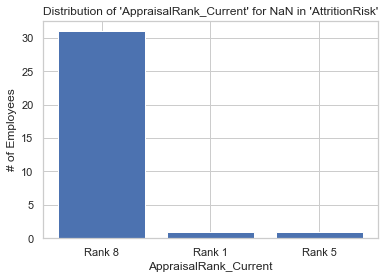

In [34]:
#getting the distribution of 'PerformanceRank_Current' of the 33 NaN values
temp_df = df[df['AttritionRisk'].isna()]
vals = temp_df['AppraisalRank_Current'].value_counts()

#plotting the bar chart
fig, ax = plt.subplots(figsize = (6,4)) #this returns a tuple of size 2
#a temporary variable "_" is added to suppress text outputs
_ = ax.bar(vals.index, vals)
_ = ax.set(title = "Distribution of 'AppraisalRank_Current' for NaN in 'AttritionRisk'",
           ylabel = "# of Employees",
           xlabel = "AppraisalRank_Current")

We investigate further by plotting the distribution of 'AttritionRisk' for employees with an 'AppraisalRank_Current' = "Rank 8" in the code below:

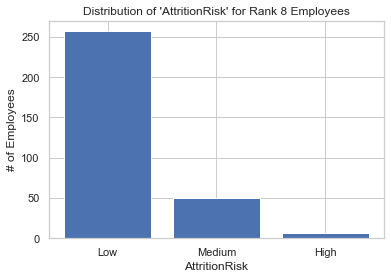

In [35]:
#getting the distribution of 'AttritionRisk' for Rank 8 employees for entire dataset
temp_df = df[df['AppraisalRank_Current'] == "Rank 8"]
vals = temp_df['AttritionRisk'].value_counts()

#plotting the bar chart
fig, ax = plt.subplots(figsize = (6,4)) #this returns a tuple of size 2
#a temporary variable "_" is added to suppress text outputs
_ = ax.bar(vals.index, vals)
_ = ax.set(title = "Distribution of 'AttritionRisk' for Rank 8 Employees",
           ylabel = "# of Employees",
           xlabel = "AttritionRisk")

As the majority of Rank 8 employees have a "Low" rate of attrition, we will fill-in the NaN values with "Low"

In [36]:
for i in range(0, len(df)):
    if pd.isna(df['AttritionRisk'][i]):
        df['AttritionRisk'][i] = "Low"
    else:
        pass

#### Cleaning NaN values - 'ExpectedNextMove'

In [37]:
#viewing the rows where 'ExpectedNextMove' is NaN
df[df['ExpectedNextMove'].isna()]

,emp_id,BusinessUnit_Primary,BusinessUnit_Secondary,Entity,Function,JobTitle,Country,City,Job_Grade,Pay_Grade,EmpDuration_Company,EmpDuration_Position,Gender,Age_Decade,Citizenship,Race,Graduate,AppraisalRank_Current,AppraisalRank_LastYear,AttritionRisk,ExpectedNextMove,TargetedRole
10,11,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 2,CAN,"Montreal, QC",3,2,>15,<1,Female,4,CA,Canadian,No,Rank 8,Rank 8,Low,NaN,NaN
13,14,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 1,CAN,"Montreal, QC",1,1,1-3,1-3,Male,2,CA,Scottish,No,Rank 8,Rank 8,Low,NaN,NaN
14,15,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 1,CAN,"Montreal, QC",4,1,1-3,1-3,Male,3,SY,English,No,Rank 8,Rank 8,Low,NaN,NaN
15,16,BU_P1,BU_S1,"Entity 14, CAN",Sales & Marketing,Analyst 1,CAN,"Montreal, QC",1,1,1-3,1-3,Female,5,CA,Canadian,No,Rank 8,Rank 8,Low,NaN,NaN
230,231,BU_P4,BU_S17,"Entity 21, USA",Sales & Marketing,Adviser 1,USA,"Chicago, IL",2,3,1-3,<1,Female,3,US,White,No,Rank 1,Rank 1,Low,NaN,NaN
294,295,BU_P5,BU_S20,"Entity 16, SGP",Sales & Marketing,Senior Adviser 2,SGP,"SingaporeCty,SG",6,6,10-15,<1,Female,4,SG,Chinese,No,Rank 8,Rank 8,Low,NaN,NaN
296,297,BU_P5,BU_S20,"Entity 15, SGP",Innovation,Manager 2,SGP,"SingaporeCty,SG",6,6,<1,<1,Female,4,MY,Chinese,No,Rank 8,Rank 8,Low,NaN,NaN
297,298,BU_P5,BU_S20,"Entity 14, CAN",Technology,Manager 2,CAN,"Montreal, QC",6,6,5-10,<1,Male,3,FR,Scottish,No,Rank 8,Rank 8,Low,NaN,NaN
315,316,BU_P5,BU_S20,"Entity 15, SGP",Sales & Marketing,Manager 2,SGP,"SingaporeCty,SG",6,6,1-3,<1,Male,3,BR,Indian,No,Rank 8,Rank 8,Low,NaN,NaN
343,344,BU_P5,BU_S20,"Entity 16, SGP",Sales & Marketing,Adviser 2,SGP,"SingaporeCty,SG",4,4,10-15,3-5,Female,3,AU,Chinese,No,Rank 8,Rank 8,Low,NaN,NaN


Similarly, we notice that of the 32 NaN values for 'ExpectedNextMove', a large proportion have 'AppraisalRank_Current' = "Rank 8" (31 out of 32 values). This can be observed with a simple bar chart in the code below:

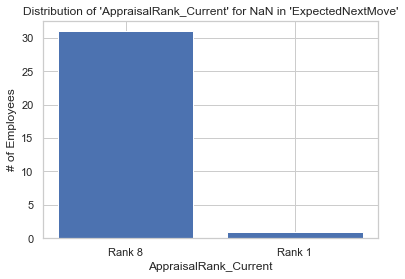

In [38]:
#getting the distribution of 'PerformanceRank_Current' of the 32 NaN values
temp_df = df[df['ExpectedNextMove'].isna()]
vals = temp_df['AppraisalRank_Current'].value_counts()

#plotting the bar chart
fig, ax = plt.subplots(figsize = (6,4)) #this returns a tuple of size 2
#a temporary variable "_" is added to suppress text outputs
_ = ax.bar(vals.index, vals)
_ = ax.set(title = "Distribution of 'AppraisalRank_Current' for NaN in 'ExpectedNextMove'",
           ylabel = "# of Employees",
           xlabel = "AppraisalRank_Current")

We investigate further by plotting the distribution of 'ExpectedNextMove' for employees with an 'AppraisalRank_Current' = "Rank 8" in the code below:

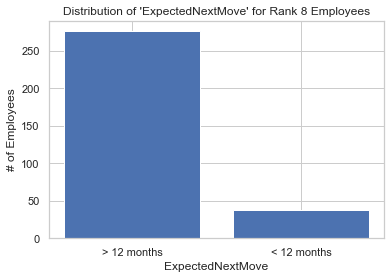

In [39]:
#getting the distribution of 'AttritionRisk' for Rank 8 employees for entire dataset
temp_df = df[df['AppraisalRank_Current'] == "Rank 8"]
vals = temp_df['ExpectedNextMove'].value_counts()

#plotting the bar chart
fig, ax = plt.subplots(figsize = (6,4)) #this returns a tuple of size 2
#a temporary variable "_" is added to suppress text outputs
_ = ax.bar(vals.index, vals)
_ = ax.set(title = "Distribution of 'ExpectedNextMove' for Rank 8 Employees",
           ylabel = "# of Employees",
           xlabel = "ExpectedNextMove")

As the majority of Rank 8 employees have an 'ExpectedNextMove' of "> 12 months", we will fill-in the NaN values with "> 12 months"

In [40]:
for i in range(0, len(df)):
    if pd.isna(df['ExpectedNextMove'][i]):
        df['ExpectedNextMove'][i] = "> 12 months"
    else:
        pass

#### Final check for NaN and problematic data

In [41]:
check_nan(df)

TargetedRole : 714  75.72%

No. of columns with NaN:  1


As we will be creating a new feature from 'TargetedRole', we will ignore the NaN values for now.

In [42]:
check_problematic(df)


No. of columns with "?":  0


<mark> Dataset is cleaned and we can proceed with Feature Engineering.

## <mark> Exploratory Data Analysis (EDA)

Now that the dataset is cleaned, we can proceed with EDA to derive insights and gain a better understanding of the dataset. Through this exercise, we can also get ideas for Feature Engineering (i.e. creating new columns from existing dataset) which will be covered later.

From the above initial data preparation, we notice that the features are categorical in nature - a mix of nominal and ordinal data - so we will be utilizing mostly bar charts to better understand their distribution. Although 'Job_Grade', 'Pay_Grade' and 'Age_Decade' and integers, they are ordinal in nature and not continuous. Therefore, a bar chart will be more appropriate.

We grouped the features into themes: 
- Location (Country, City) 
- Duration (EmpDuration_Company, EmpDuration_Position)
- Employee Profile (Gender, Age_Decade, Citizenship, Race, Graduate, Job Title, Job_Grade, Pay_Grade)
- Business Unit (BusinessUnit_Primary, BusinessUnit_Secondary, Entity, Function)
- Career Trajectory (ExpectedNextMove)
- Performance (AppraisalRank_Current, AppraisalRank_LastYear)
- Attrition (AttritionRisk)

This is executed in the code below:

In [43]:
location = ['Country', 'City']

duration = ['EmpDuration_Company', 'EmpDuration_Position']

employee_profile = ['Gender', 'Age_Decade', 'Citizenship', 'Race', 'Graduate', 'JobTitle',
                    'Job_Grade', 'Pay_Grade']

business_unit = ['BusinessUnit_Primary', 'BusinessUnit_Secondary', 'Entity', 'Function']

career_traject = ['ExpectedNextMove'] #we exclude 'TargetedRole' as there is still NaN values

performance = ['AppraisalRank_Current', 'AppraisalRank_LastYear']

attrition = ['AttritionRisk']

In [44]:
#creating a plotting function for bar charts with count and % labels
def bar_count_perc(df, cols):
    for col in cols:
        fig, ax = plt.subplots(figsize = (12, 4))
        catp = sns.countplot(x = col, data = df)
        ax.set_title("# of Employees by: " + col + " (" + str(len(df[col])) + " observations)")
        ax.set_xlabel(col)
        ax.set_ylabel("# of Employees")
        ax.set_xticklabels(catp.get_xticklabels(), rotation = 90)
        
        #to get the count of observations above each bar
        count = [p.get_height() for p in catp.patches]
        patch = [p for p in catp.patches]
        num_of_cat = len(df[col].unique())
        for i in range(num_of_cat):
            x = patch[i].get_x() + patch[i].get_width() / 2 - 0.15 #x-position of label
            y = patch[i].get_y() + patch[i].get_height() + 0.15 #y-position of label
            catp.annotate(str(count[i]) + #to get the count of each bar
                          ", " + 
                          str(round(count[i]/len(df[col])*100, 2)) + #to get the % of each bar
                          "%", 
                          (x, y), size = 10, rotation = 45)
    plt.show()

#### EDA: Location features

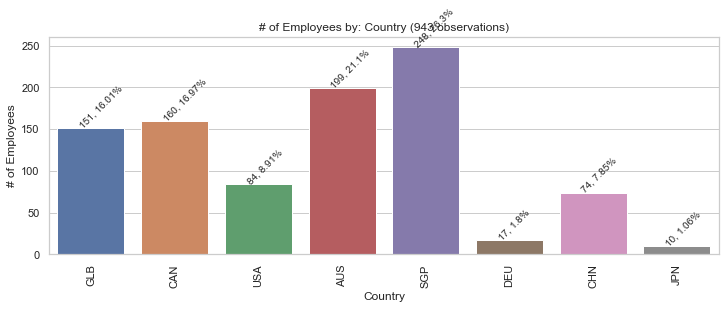

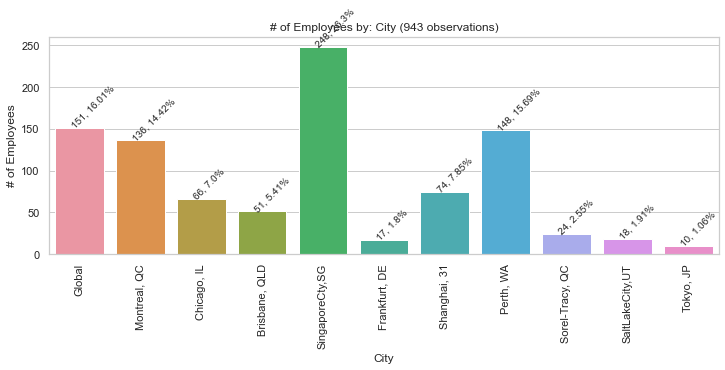

In [45]:
bar_count_perc(df, location)

<mark> **Analysis:**
- Nothing super informative here, we note that majority of employees are based in SGP (26%) and AUS (21%)

#### EDA: Duration features

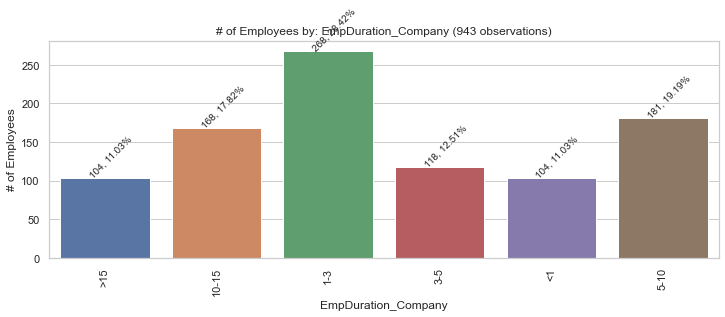

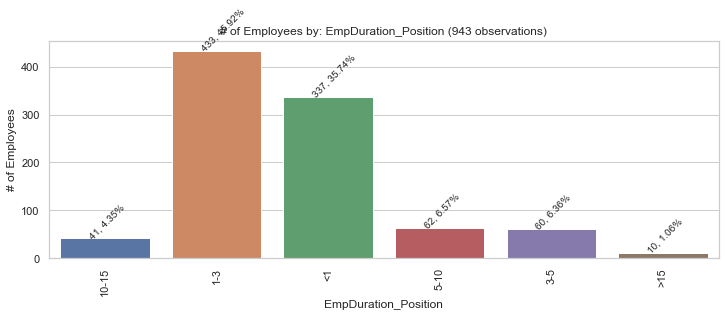

In [46]:
bar_count_perc(df, duration)

<mark> **Analysis:**
- **EmpDuration_Company:** 
    - 28% of employees are employed for 1-3 years
    - 39% have been employed for <3 years
    - 48% have been employed >5 years, so employee loyalty is quite decent
- **EmpDuration_Position:**
    - 46% have been in their position for 1-3 years
    - 82% have been in their position for <3 years
    - 18% have been in their position for >3 years and 12% for >5 years; these "stagnant" employees are a potential area of interest

<span style = "color:blue"> **Idea(s) for Feature Engineering:**
- Create a feature to indicate if an employee has stayed in their position >3 years or >5 years to identify these "stagnant" employees

#### EDA: Employee Profile features

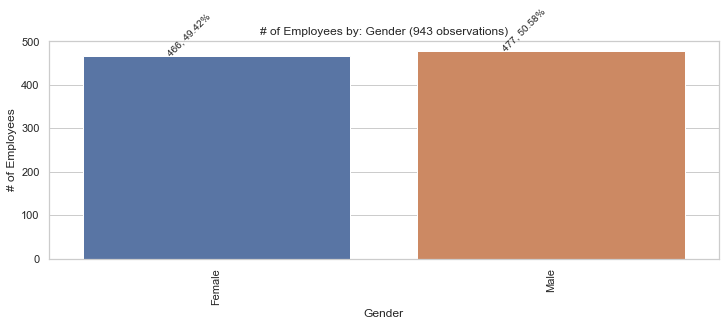

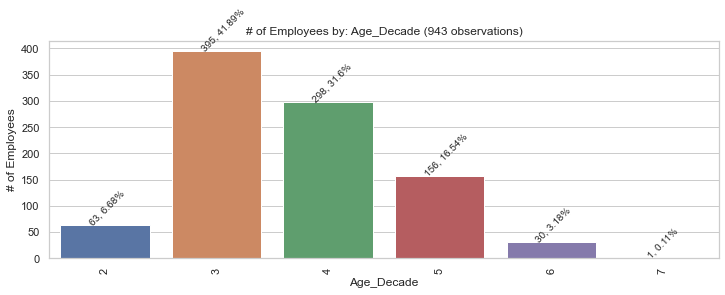

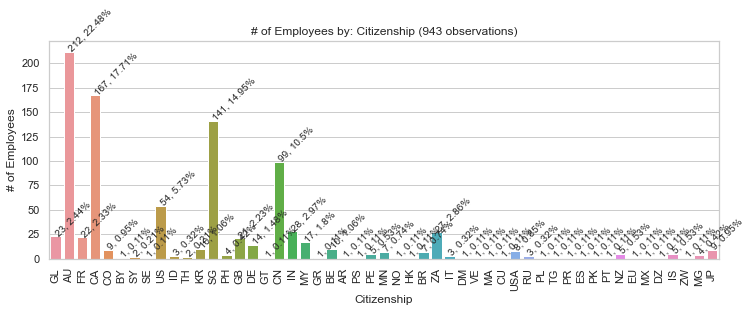

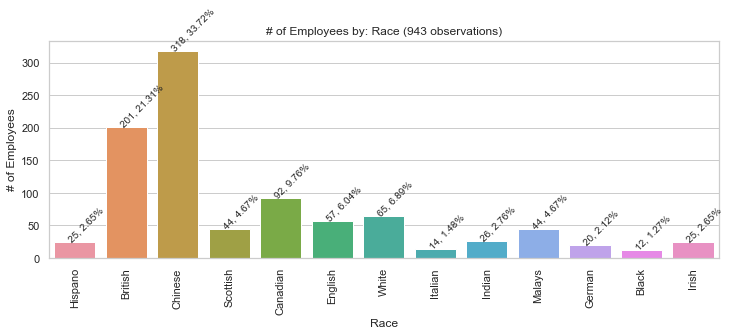

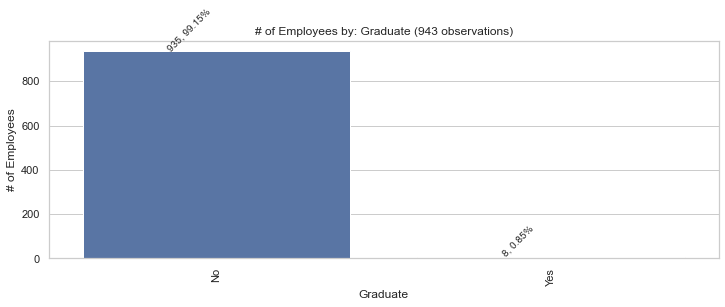

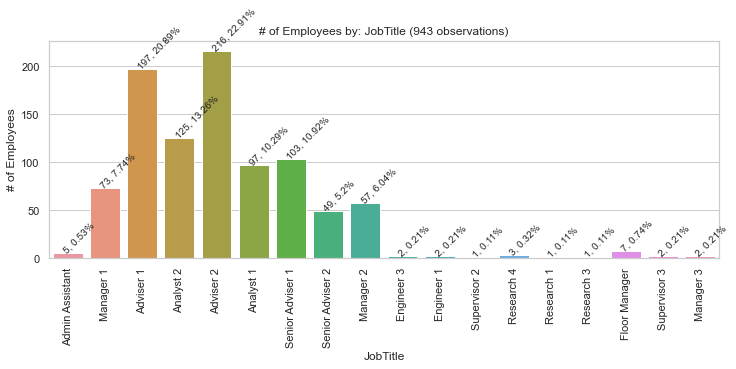

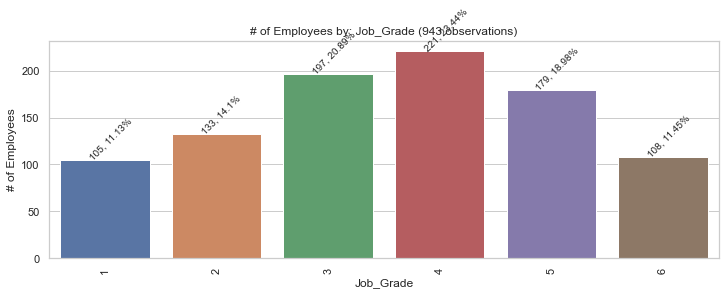

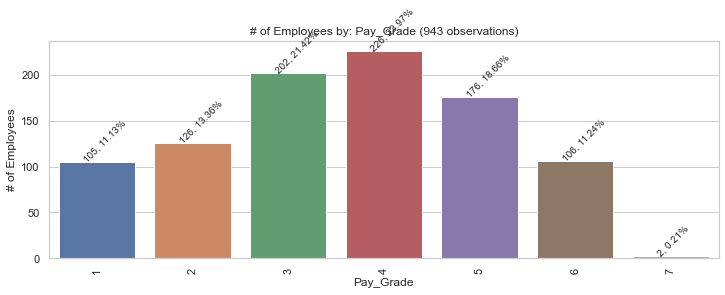

In [47]:
bar_count_perc(df, employee_profile)

<mark> **Analysis:**
- **Gender:** 
    - A good mix of gender across the firm (50:50) indicating that gender diversity at a firm-level is not a concern
- **Age_Decade:**
    - Employees mostly in their 30's (42%) and 40's (32%)
    - Observe a fairly low % of employees in their 20's (7%)
    - 20% of older employees (50's, 60's and 70's)
    - Age diversity seems normal, we could compare with benchmarks to get a sense. Although the smaller % of employees in their 20's could point toward greater efforts at graduate recruitment
- **Citizenship:** 
    - High cardinality observed in the feature with 51 different citizenships across the firm, might not be useful for machine learning
- **Race:** 
    - Chinese (34%) and British (21%) stand-out at the highest percentage
- **Graduate:** 
    - Most employees are non-graduates (99%)
    - There is severe imbalance in the feature, probably not useful for machine learning later on
- **JobTitle:** 
    - Senior Advisers and Advisers form the majority of the employee base at 60%
    - 14% of employees are Managers
    - Remaining 26% are in support-related roles (Admin Assistant, Analyst, Engineer, Research, Supervisor, Floor Manager)
    - Can consider grouping/clustering to reduce cardinality of the feature
- **Job_Grade:** 
    - Quite balanced across the firm, can consider grouping/clustering values for seniority
- **Pay_Grade:** 
    - Compensation centred around the mean ('Pay_Grade' = 4)

#### EDA: Business Unit features

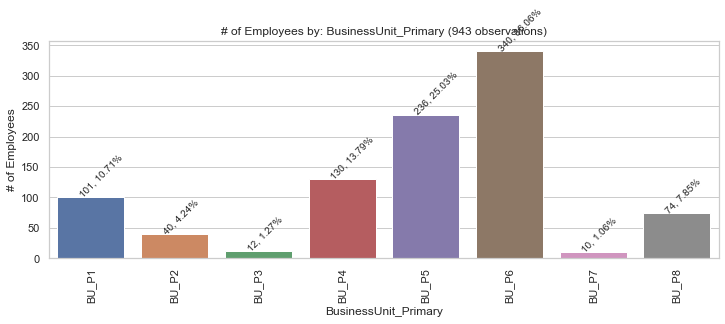

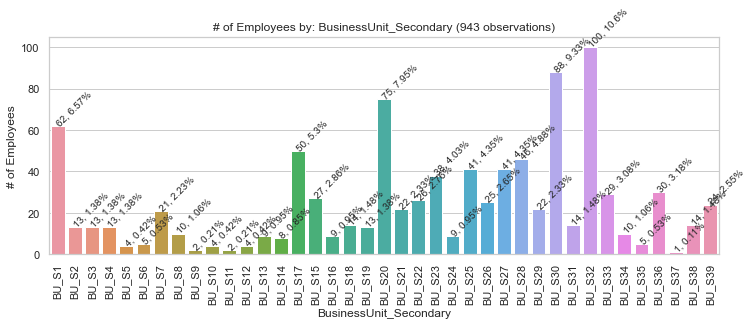

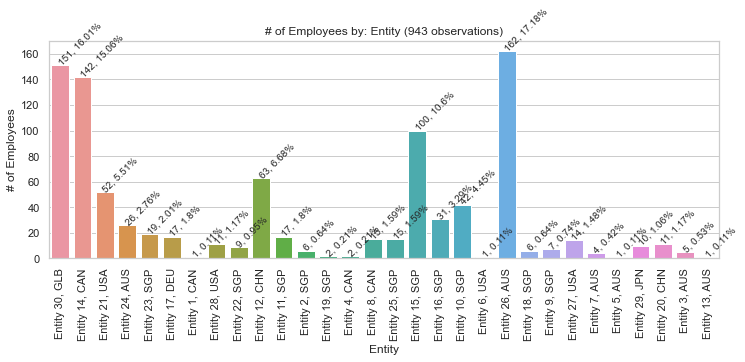

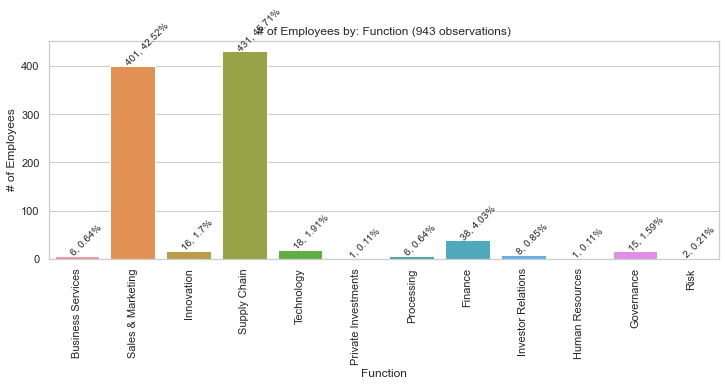

In [48]:
bar_count_perc(df, business_unit)

<mark> **Analysis:**
- **BusinessUnit_Secondary/Entity:** 
    - High cardinality in both features (39 in BusinessUnit_Secondary and 30 in Entity), we might not require that much granuality to BusinessUnit_Secondary and Entity for machine learning later on. Furthermore, some information captured in 'Entity' can also be found in 'Country' or 'City'
- **Function:**
    - In-line with what we observed for 'Job Title' above, we do see a higher proportion in "Sales & Marketing" (43%) and also in "Supply Chain" (46%); can consider clustering to reduce cardinality

#### EDA: Career Trajectory features

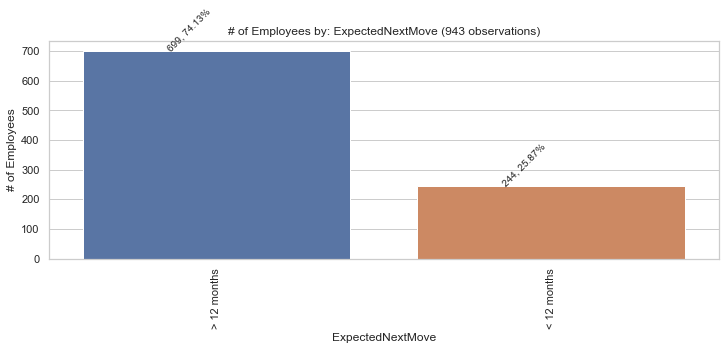

In [49]:
bar_count_perc(df, career_traject)

<mark> **Analysis:**
- **ExpectedNextMove:** 
    - 74% of employees have an ExpectedNextMove in >12 months, indicating that most employees are not up for a promotion

#### EDA: Performance features

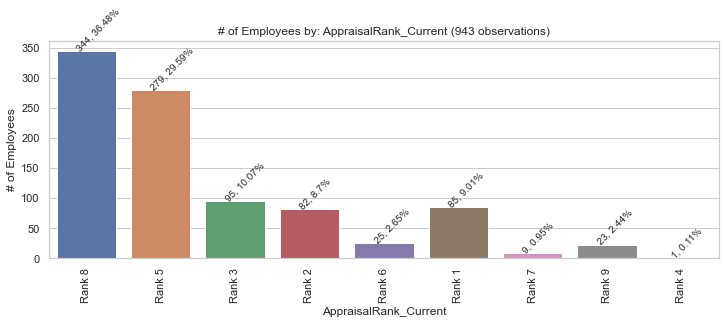

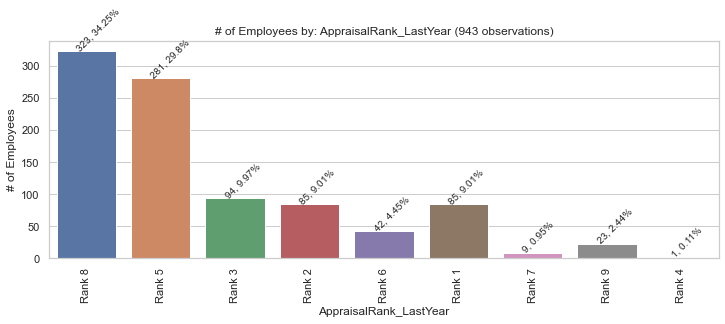

In [50]:
bar_count_perc(df, performance)

<mark> **Analysis:**
- **AppraisalRank_Current:** 
    - Most employees are ranked 8 (36%) and 5 (30%)
    - Only 2% of employees are ranked 9, which indicates that employee performance is decent

<span style = "color:blue"> **Idea(s) for Feature Engineering:**
- Create a feature to compare the change in appraisal rank from the previous year

#### EDA: Attrition features

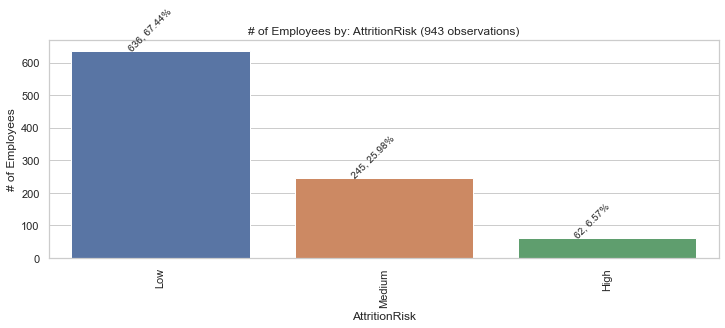

In [51]:
bar_count_perc(df, attrition)

<mark> **Analysis:**
- **AttritionRisk:** 
    - Most employees are at a "Low" risk (67%)
    - Only 7% of employees are at a "High" risk
    - Note class imbalance towards "Low" in the feature

More insights can be derived from a dashboarding tool (Tableau/PowerBI) that allows you to drill deeper into country-level, business unit-level, etc. However, for the purposes of machine learning, we will proceed to Feature Engineering.

## <mark> Feature Engineering

We will create new features (columns) from the dataset that might provide a different data perspective or aggregate columns to reduce the cardinality of features.

#### Location: create 'ForeignCountry' binary flag based on 'Country' and 'Citizenship'

To observe if working in an overseas country has an impact on an employees performance/attrition risk, where "No" = 0 and "Yes" = 1

In [52]:
cols = ['Country', 'Citizenship']
for i in cols:
    print('-' * 20)
    print(i)
    print(df[i].value_counts())
    print('')

--------------------
Country
SGP    248
AUS    199
CAN    160
GLB    151
USA     84
CHN     74
DEU     17
JPN     10
Name: Country, dtype: int64

--------------------
Citizenship
AU     212
CA     167
SG     141
CN      99
US      54
IN      28
ZA      27
GL      23
FR      22
GB      21
MY      17
DE      14
KR      10
BE      10
CO       9
JP       9
USA      8
BR       7
MN       7
IS       5
PE       5
NZ       5
MG       4
PH       4
ID       3
RU       3
IT       3
SY       2
TH       2
CU       1
ZW       1
PK       1
MA       1
SE       1
DM       1
ES       1
EU       1
GT       1
PT       1
BY       1
PS       1
VE       1
NO       1
TG       1
HK       1
PR       1
DZ       1
GR       1
MX       1
PL       1
AR       1
Name: Citizenship, dtype: int64



Based on the above, we have to re-code the 3-letter ISO code for 'Country' into 2-letter ISO code

In [53]:
country_dict = {"SGP": "SG", "AUS": "AU", "CAN": "CA", "GLB": "GL", "USA": "US", "CHN": "CN",
                 "DEU": "DE", "JPN": "JP", }
df['Country'] = df['Country'].map(country_dict)

In [54]:
#creating the binary flag 'ForeignCountry'
df['ForeignCountry'] = np.where(df['Country'] == df['Citizenship'], 0, 1)
df[['Country', 'Citizenship', 'ForeignCountry']]

,Country,Citizenship,ForeignCountry
0,GL,GL,0
1,GL,GL,0
2,GL,AU,1
3,GL,FR,1
4,CA,CA,0
...,...,...,...
938,AU,AU,0
939,AU,AU,0
940,AU,AU,0
941,GL,AU,1


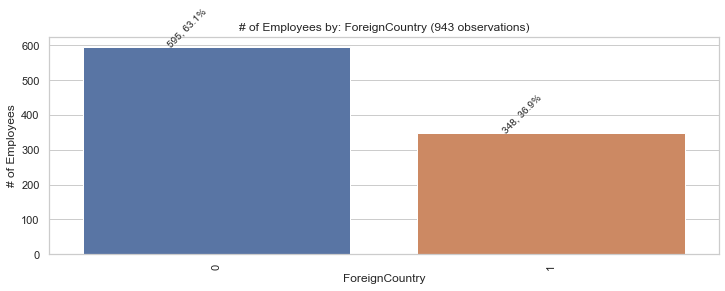

In [55]:
#to observe the distribtion of ForeignCountry
cols = ['ForeignCountry']
bar_count_perc(df, cols)

In [56]:
#add 'ForeignCountry' to Location features
location.append('ForeignCountry')

#### Duration: recode 'EmpDuration_Company' and 'EmpDuration_Position' into numeric and create 'Position_>3Y' and 'Position_>5Y binary flags

To indicate potential "stagnant" employees, where "No" = 0 and "Yes" = 1

In [57]:
#recode 'EmpDuration_Company' and 'EmpDuration_Position' into numeric
#as the intervals are not even, we take the mid-point of each interval
tenure_dict = {"<1": 1, "1-3": 2, "3-5": 4, "5-10": 7.5, "10-15": 12.5, ">15": 15}
df = df.replace({'EmpDuration_Company': tenure_dict})
df = df.replace({'EmpDuration_Position': tenure_dict})

In [58]:
#create 'Position_>3Y' and 'Position_>5Y binary flags
df['Position_>3Y'] = np.where(df['EmpDuration_Position'] > 2, 1, 0)
df['Position_>5Y'] = np.where(df['EmpDuration_Position'] > 4, 1, 0)

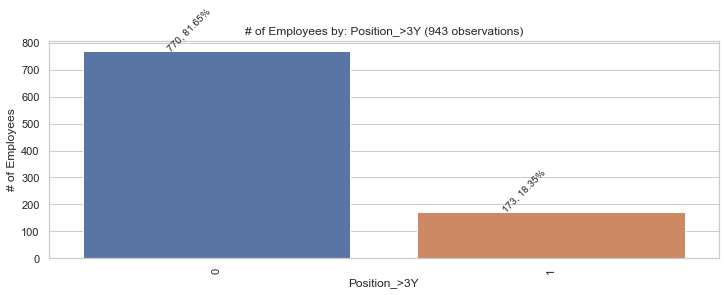

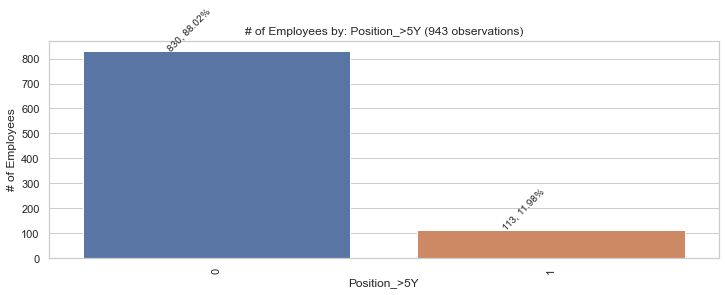

In [59]:
#to observe the distribtion of 'Position_>3Y' and 'Position_>5Y binary flags
cols = ['Position_>3Y', 'Position_>5Y']
bar_count_perc(df, cols)

In [60]:
#add 'Position_>3Y' and 'Position_>5Y' to Duration features
duration.extend(['Position_>3Y', 'Position_>5Y'])

#### Employee Profile: create 'Seniority' feature and cluster values in 'JobTitle' to create 'JobTitleAgg'

To indicate an employee's level of seniority in the firm. From the crosstab below, we observe that:
- Job_Grade 6: Manager 2, Manager 3, Senior Adviser 1 and Senior Adviser 2
- Job_Grade 5: Adviser 2, Manager 1, Manager 2, Senior Adviser 1 and Senior Adviser 2
- Job_Grade 4: Adviser 1, Manager 2, Analyst 1, Analyst 2, Floor Manager, Manager 1, Research 4, Senior Adviser 1
- Job_Grade 3: Adviser 1, Adviser 2, Analyst 2, Engineer 3, Floor Manager 1, Research 3, and Supervisor 3
- Job_Grade 2: Adviser 1, Adviser 2, Analyst 1 and Analyst 2
- Job_Grade 1: Admin Assistant, Adviser 1, Analyst 1, Analyst 2, Engineer 1, Research 1 and Supervisor 2

Therefore, we will define **'Seniority'** as follows:
- **Junior = 1:** Job_Grade 1 and 2
- **Mid-level = 2:** Job_Grade 3 and 4
- **Senior = 3:** Job_Grade 5 and 6

To reduce the cardinality of 'JobTitle' from 18, we cluster the values to create 'JobTitleAgg' with 7 unique values. **'JobTitleAgg'** defined as follows:
- **Adviser:** = Adviser 1, Adviser 2, Senior Adviser 1, and Senior Adviser 2
- **Analyst:** = Analyst 1 and Analyst 2
- **Manager:** = Manager 1, Manager 2, and Manager 3
- **Research:** = Research 1, Research 3, and Research 4
- **Engineer:** = Engineer 1 and Engineer 3
- **Supervisor:** = Supervisor 2 and Supervisor 3
- **Admin Assistant:** = Admin Assistant
- **Floor Manager:** = Floor Manager

In [61]:
pd.crosstab(index = df['JobTitle'], columns = df['Job_Grade'])

Job_Grade,1,2,3,4,5,6
JobTitle,,,,,,
Admin Assistant,5,0,0,0,0,0
Adviser 1,2,9,178,8,0,0
Adviser 2,0,1,10,197,8,0
Analyst 1,91,5,0,1,0,0
Analyst 2,3,118,3,1,0,0
Engineer 1,2,0,0,0,0,0
Engineer 3,0,0,2,0,0,0
Floor Manager,0,0,1,6,0,0
Manager 1,0,0,0,1,72,0


In [62]:
#creating the dictionary for 'Seniority'
seniority_dict = {1: 1, 2: 1, 
                  3: 2, 4: 2,
                  5: 3, 6: 3}

#create 'Seniority' column
df['Seniority'] = df['Job_Grade'].map(seniority_dict)

In [63]:
df['JobTitle'].value_counts()

Adviser 2           216
Adviser 1           197
Analyst 2           125
Senior Adviser 1    103
Analyst 1            97
Manager 1            73
Manager 2            57
Senior Adviser 2     49
Floor Manager         7
Admin Assistant       5
Research 4            3
Supervisor 3          2
Manager 3             2
Engineer 3            2
Engineer 1            2
Research 3            1
Supervisor 2          1
Research 1            1
Name: JobTitle, dtype: int64

In [64]:
#creating the dictionary for 'JobTitleAgg'
title_dict = {"Adviser 1": "Adviser", "Adviser 2": "Adviser",
              "Senior Adviser 1": "Adviser", "Senior Adviser 2": "Adviser",
              "Analyst 1": "Analyst", "Analyst 2": "Analyst",
              "Manager 1": "Manager", "Manager 2": "Manager", "Manager 3": "Manager",
              "Research 1": "Research", "Research 3": "Research", "Research 4": "Research",
              "Engineer 1": "Engineer", "Engineer 3": "Engineer",
              "Supervisor 2": "Supervisor", "Supervisor 3": "Supervisor",
              "Admin Assistant": "Admin Assistant",
              "Floor Manager": "Floor Manager"}

#create 'JobTitleAgg' column
df['JobTitleAgg'] = df['JobTitle'].map(title_dict)

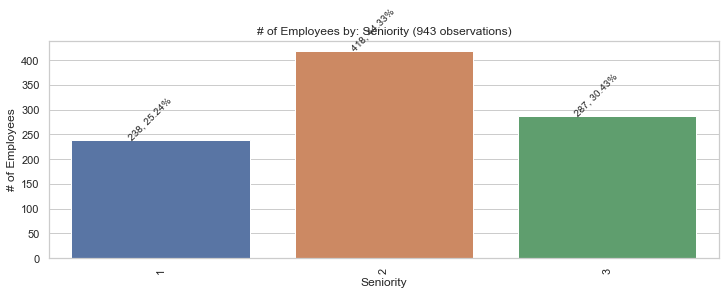

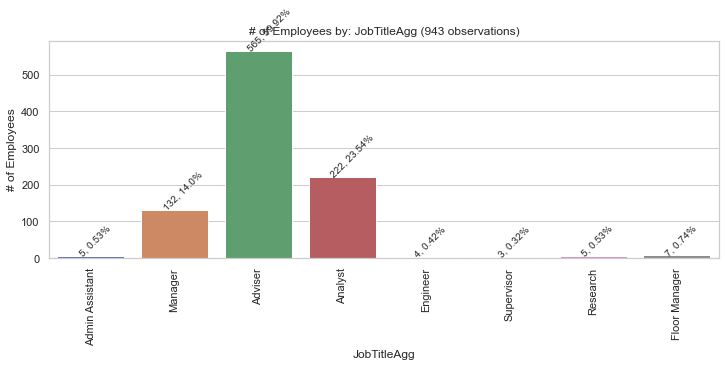

In [65]:
#to observe the distribtion of 'Seniority' and 'JobTitleAgg'
cols = ['Seniority', 'JobTitleAgg']
bar_count_perc(df, cols)

In [66]:
#add 'Seniority' and 'JobTitleAgg' to Employee Profile features
employee_profile.extend(['Seniority', 'JobTitleAgg'])

#### Business Unit: cluster values in 'Function' feature

To reduce the cardinality of 'Function' from 12, we cluster the values to 3 unique values. **'Function'** re-defined as follows:
- **Supply Chain:** = Supply Chain
- **Sales & Marketing:** = Sales & Marketing
- **Others:** = Not in Supply Chain and Sales & Marketing

In [67]:
df['Function'].value_counts()

Supply Chain           431
Sales & Marketing      401
Finance                 38
Technology              18
Innovation              16
Governance              15
Investor Relations       8
Processing               6
Business Services        6
Risk                     2
Private Investments      1
Human Resources          1
Name: Function, dtype: int64

In [68]:
#creating the new dictionary for 'Function'
function_dict = {"Supply Chain": "Supply Chain", "Sales & Marketing": "Sales & Marketing",
                 "Finance": "Others", "Technology": "Others", "Innovation": "Others",
                 "Governance": "Others", "Investor Relations": "Others", "Business Services": "Others",
                 "Processing": "Others", "Risk": "Others", 
                 "Human Resources": "Others", "Private Investments": "Others"}

#re-map 'Function' column
df['Function'] = df['Function'].map(function_dict)

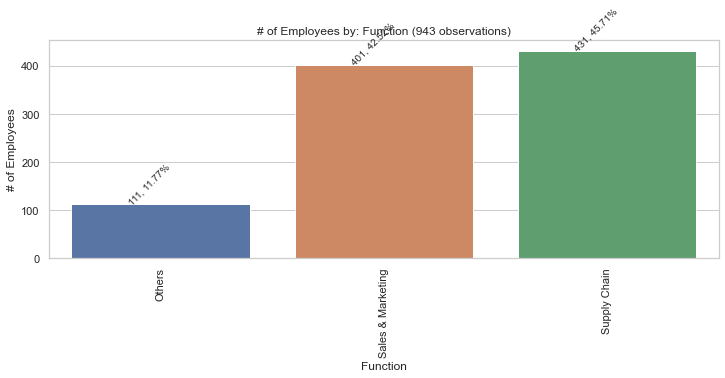

In [69]:
#to observe the distribtion of 'Function' after clustering
cols = ['Function']
bar_count_perc(df, cols)

#### Career Trajectory: create 'PromoEligibility' feature and 'TargetedRoleIdentified' feature

To indicate an employee's eligiblity for promotion. We define **'PromoEligibility'** as follows:
- **No:** = **0**, where 'ExpectedNextMove' = "> 12 months"
- **Yes:** = **1**, where 'ExpectedNextMove' = "< 12 months"

To indicate whether a new role has been identified for an employee. This also helps treat the NaN values observed in 'TargetedRole' we discussed earlier. We define **'TargetedRoleIdentified'** as follows:
- **No:** = **0**, where 'TargetedRole' = NaN
- **Yes:** = **1**, where 'TargetedRole' = not NaN

In [70]:
#create 'PromoEligibility' column
df['PromoEligibility'] = np.where(df['ExpectedNextMove'] == "> 12 months", 0, 1)

In [71]:
#create 'TargetedRoleIdentified' column
df['TargetedRoleIdentified'] = np.where(df['TargetedRole'].isna(), 0, 1)

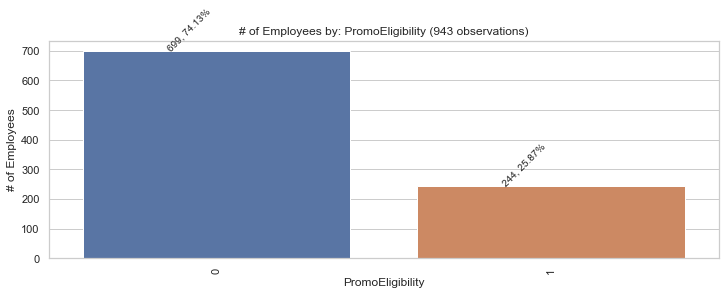

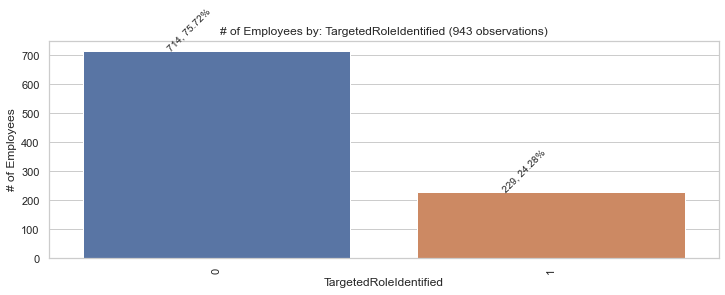

In [72]:
#to observe the distribtion of 'PromoEligibility' and 'TargetedRoleIdentified'
cols = ['PromoEligibility','TargetedRoleIdentified']
bar_count_perc(df, cols)

In [73]:
#add 'PromoEligibility' and 'TargetedRoleIdentified' to Career Trajectory features
career_traject.extend(['PromoEligibility', 'TargetedRoleIdentified'])

#### Performance: (i) recode 'AppraisalRank_Current' and 'AppraisalRank_LastYear' to numeric, (ii) create 'ChangeInAppraisalRank', (iii) create 'PerformanceRank' and 'PotentialRank' features from 'AppraisalRank'

To indicate an employee's change in appraisal rank. We define **'ChangeInAppraisalRank'** as follows:
- = 'AppraisalRank_Current' - 'AppraisalRank_LastYear'

From the company's employee appraisal matrix, we can breakdown their rank into 2 aspects: Performance and Potential, define as follows:
- **AppraisalRank = 1**: **PerformanceRank = 3** (High) and **PotentialRank = 3** (High)
- **AppraisalRank = 2**: **PerformanceRank = 2** (Medium) and **PotentialRank = 3** (High)
- **AppraisalRank = 3**: **PerformanceRank = 3** (High) and **PotentialRank = 2** (Medium)
- **AppraisalRank = 4**: **PerformanceRank = 1** (Low) and **PotentialRank = 3** (High)
- **AppraisalRank = 5**: **PerformanceRank = 2** (Medium) and **PotentialRank = 2** (Medimum)
- **AppraisalRank = 6**: **PerformanceRank = 3** (High) and **PotentialRank = 1** (Low)
- **AppraisalRank = 7**: **PerformanceRank = 1** (Low) and **PotentialRank = 2** (Medimum)
- **AppraisalRank = 8**: **PerformanceRank = 2** (Medium) and **PotentialRank = 1** (Low)
- **AppraisalRank = 9**: **PerformanceRank = 1** (Low) and **PotentialRank = 1** (Low)

In [74]:
#recode 'AppraisalRank_Current' and 'AppraisalRank_LastYear' into numeric
rank_dict = {"Rank 1": 1, "Rank 2": 2, "Rank 3": 3, "Rank 4": 4, "Rank 5": 5, 
             "Rank 6": 6, "Rank 7": 7, "Rank 8": 8, "Rank 9": 9}
df = df.replace({'AppraisalRank_Current': rank_dict})
df = df.replace({'AppraisalRank_LastYear': rank_dict})

In [75]:
#create 'ChangeInAppraisalRank' column
df['ChangeInAppraisalRank'] = df['AppraisalRank_Current'] - df['AppraisalRank_LastYear']
#note that positive numbers indicate either a drop in performance or potential,
#according to the company's appraisal matrix

In [76]:
#view the employees who had a change in appraisal rank
temp = df[df['ChangeInAppraisalRank'] != 0]
temp[['AppraisalRank_Current', 'AppraisalRank_LastYear', 'ChangeInAppraisalRank']]

,AppraisalRank_Current,AppraisalRank_LastYear,ChangeInAppraisalRank
28,8,6,2
34,6,5,1
78,8,6,2
112,8,6,2
113,8,6,2
114,8,6,2
126,3,2,1
142,8,6,2
171,8,6,2
173,6,5,1


In [77]:
#creating the dictionary for performance rank
#Low = 1, Medium = 2, High = 3
pfrank_dict = {1: 3, 2: 2, 3: 3, 4: 1, 5: 2, 6: 3, 7: 1, 8: 2, 9: 1}

#create 'PerformanceRank_Current' column
df['PerformanceRank_Current'] = df['AppraisalRank_Current'].map(pfrank_dict)

#create 'PerformanceRank_LastYear' column
df['PerformanceRank_LastYear'] = df['AppraisalRank_LastYear'].map(pfrank_dict)

#creating the dictionary for potential rank
#Low = 1, Medium = 2, High = 3
ptrank_dict = {1: 3, 2: 3, 3: 2, 4: 3, 5: 2, 6: 1, 7: 2, 8: 1, 9: 1}

#create 'PotentialRank_Current' column
df['PotentialRank_Current'] = df['AppraisalRank_Current'].map(pfrank_dict)

#create 'PotentialRank_LastYear' column
df['PotentialRank_LastYear'] = df['AppraisalRank_LastYear'].map(pfrank_dict)


#create 'ChangeInPerformanceRank' columns
df['ChangeInPerformanceRank'] = df['PerformanceRank_Current'] - df['PerformanceRank_LastYear']

#create 'ChangeInPotentialRank' columns
df['ChangeInPotentialRank'] = df['PotentialRank_Current'] - df['PotentialRank_LastYear']

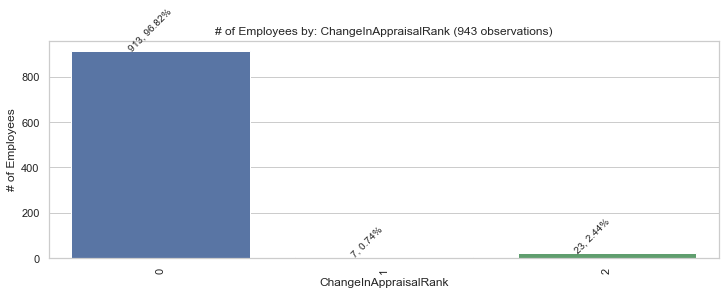

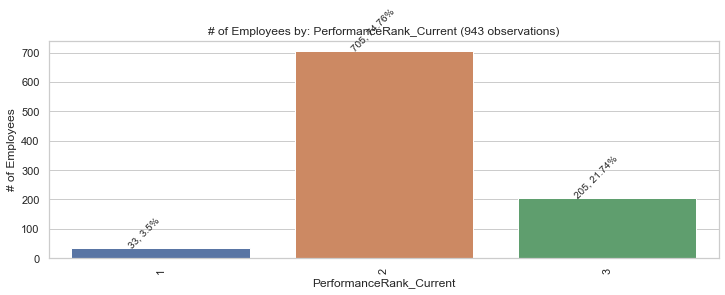

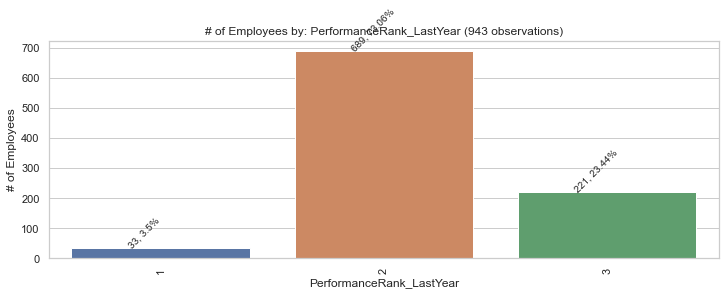

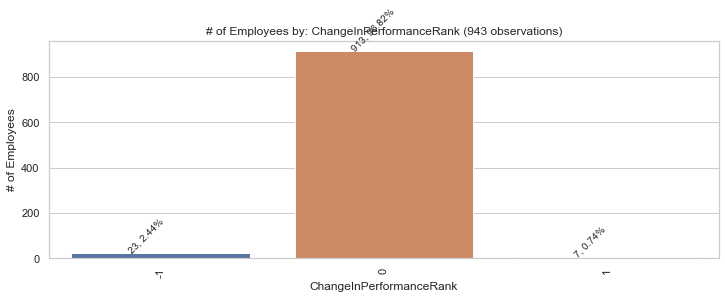

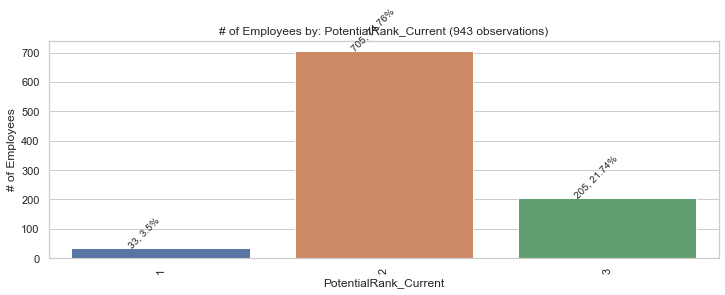

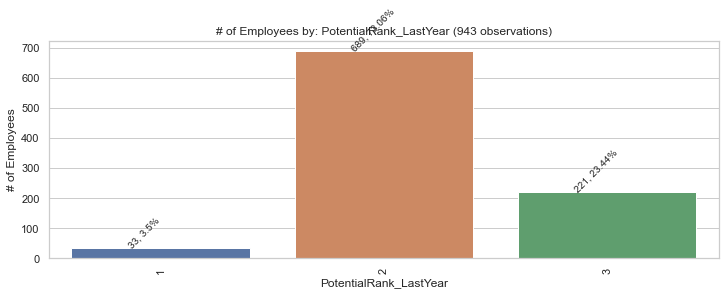

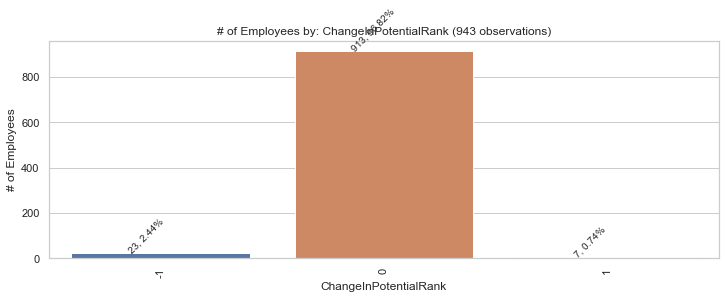

In [78]:
#to observe the distribtion of the columns we create above
cols = ['ChangeInAppraisalRank','PerformanceRank_Current', 'PerformanceRank_LastYear',
        'ChangeInPerformanceRank', 'PotentialRank_Current', 'PotentialRank_LastYear',
        'ChangeInPotentialRank']
bar_count_perc(df, cols)

In [79]:
#add new columns to Performance features
performance.extend(['ChangeInAppraisalRank','PerformanceRank_Current', 'PerformanceRank_LastYear',
        'ChangeInPerformanceRank', 'PotentialRank_Current', 'PotentialRank_LastYear',
        'ChangeInPotentialRank'])

#### Attrition: recode 'AttritionRisk' to numeric

Defined as follows:
- **AttritionRisk = Low = 1**
- **AttritionRisk = Medium = 2**
- **AttritionRisk = High = 3**

In [80]:
#recode 'AttritionRisk' into numeric
ar_dict = {"Low": 1, "Medium": 2, "High": 3}
df = df.replace({'AttritionRisk': ar_dict})

As discussed earlier during EDA, high granuality and cardinality in 'BusinessUnit_Secondary' and 'Entity' is unlikely to be useful for machine learning. The same applies for 'Citizenship'. As a quick clean-up, we will drop these 3 columns from the dataframe.

Additionally, we also created new features from 'Job_Grade', 'JobTitle', 'ExpectedNextMove' and 'TargetedRole'. Therefore, we will also remove these 4 columns from the dataframe.

Lastly, as information in 'AppraisalRank_Current', 'AppraisalRank_LastYear' and 'ChangeInAppraisalRank' was broken down into Performance and Potential, we will also be dropping them from the dataset to avoid collinearity issues. This also applies to 'City' as information is similar between 'City' and 'Country', so we will drop 'City' as we do not need city-level granuality.

In [81]:
#note that we are keeping 'emp_id' as we might require it later for Clustering
#to produce an output of emp_id with the cluster outputs
df.drop(['BusinessUnit_Secondary', 'Entity', 'Citizenship', 
         'Job_Grade', 'JobTitle', 'ExpectedNextMove', 'TargetedRole',
         'AppraisalRank_Current', 'AppraisalRank_LastYear', 'ChangeInAppraisalRank', 'City'],
         axis = 1, inplace = True)

We will export the clean dataframe with new features to a new .csv file and proceed with the machine learning models in another notebook.

In [82]:
df.to_csv("C:/Users/Kenny Chiang/BCG RISE/Capstone/dummy_HR_data_ML.csv", index = False)